In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox
from IPython.display import display, clear_output

class SpikingNeuronInteractive:
    def __init__(self, resting_potential=-70.0, threshold=-55.0, reset_potential=-75.0, 
                 tau=10.0, resistance=10.0, dt=0.1):
        self.resting_potential = resting_potential
        self.threshold = threshold
        self.reset_potential = reset_potential
        self.tau = tau
        self.resistance = resistance
        self.dt = dt
        self.membrane_potential = resting_potential
        self.time = 0.0
        self.spike_times = []

    def update(self, input_current):
        dV = (-(self.membrane_potential - self.resting_potential) + 
              self.resistance * input_current) * (self.dt / self.tau)
        self.membrane_potential += dV
        if self.membrane_potential >= self.threshold:
            self.membrane_potential = self.reset_potential
            self.spike_times.append(self.time)
        self.time += self.dt

    def get_interspike_intervals(self):
        if len(self.spike_times) < 2:
            return []
        return np.diff(self.spike_times)


# Initialize the neuron and parameters
neuron = SpikingNeuronInteractive()
sim_duration = 1000  # Total simulation duration (ms)
dt = neuron.dt
def simulate(input_rate=2.5, voltage_shift=0.0):
    # Properly reset neuron parameters for each simulation
    neuron.membrane_potential = neuron.resting_potential + voltage_shift
    neuron.reset_potential = -75 + voltage_shift
    neuron.spike_times = []
    neuron.time = 0.0  # Reset simulation time to zero

    time_points = np.arange(0, sim_duration, dt)
    membrane_potentials = []
    
    for _ in time_points:
        neuron.update(input_rate)
        membrane_potentials.append(neuron.membrane_potential)

    # Compute interspike intervals (ensure they are non-negative)
    interspike_intervals = neuron.get_interspike_intervals()
    if any(interval < 0 for interval in interspike_intervals):
        print("Warning: Negative interspike intervals detected!")
    
    clear_output(wait=True)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Left subplot: Membrane potential
    ax[0].plot(time_points, membrane_potentials, color="blue")
    ax[0].axhline(neuron.threshold, color='red', linestyle='--', label="Threshold")
    ax[0].set_title("Membrane Potential")
    ax[0].set_xlabel("Time (ms)")
    ax[0].set_ylabel("Membrane Potential (mV)")
    ax[0].legend()
    
    # Middle subplot: ISI histogram
    ax[1].hist(interspike_intervals, bins=20, color="green", edgecolor="black")
    ax[1].set_title("Interspike Interval (ISI) Histogram")
    ax[1].set_xlabel("ISI (ms)")
    ax[1].set_ylabel("Count")

    # Right subplot: Number of spikes
    ax[2].bar(x=[0], height=[len(interspike_intervals)], color="purple")
    ax[2].set_ylim(0, 50)
    ax[2].set_xticks([0])
    ax[2].set_xticklabels(["Spike Count"])
    ax[2].set_title("Number of Spikes")
    
    plt.tight_layout()
    plt.show()
    print(interspike_intervals, end='\r')


# Interactive widgets
rate_slider = FloatSlider(value=1.7, min=0.0, max=5.0, step=0.1, description="Input Rate (nA)")
voltage_slider = FloatSlider(value=0.0, min=-1, max=1, step=0.1, description="Voltage Shift (mV)")

interact(simulate, input_rate=rate_slider, voltage_shift=voltage_slider)


interactive(children=(FloatSlider(value=1.7, description='Input Rate (nA)', max=5.0), FloatSlider(value=0.0, d…

<function __main__.simulate(input_rate=2.5, voltage_shift=0.0)>

In [19]:
np.diff(neuron.spike_times)

array([23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9,
       23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9,
       23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9,
       23.9, 23.9, 23.9, 23.9, 23.9, 23.9, 23.9])

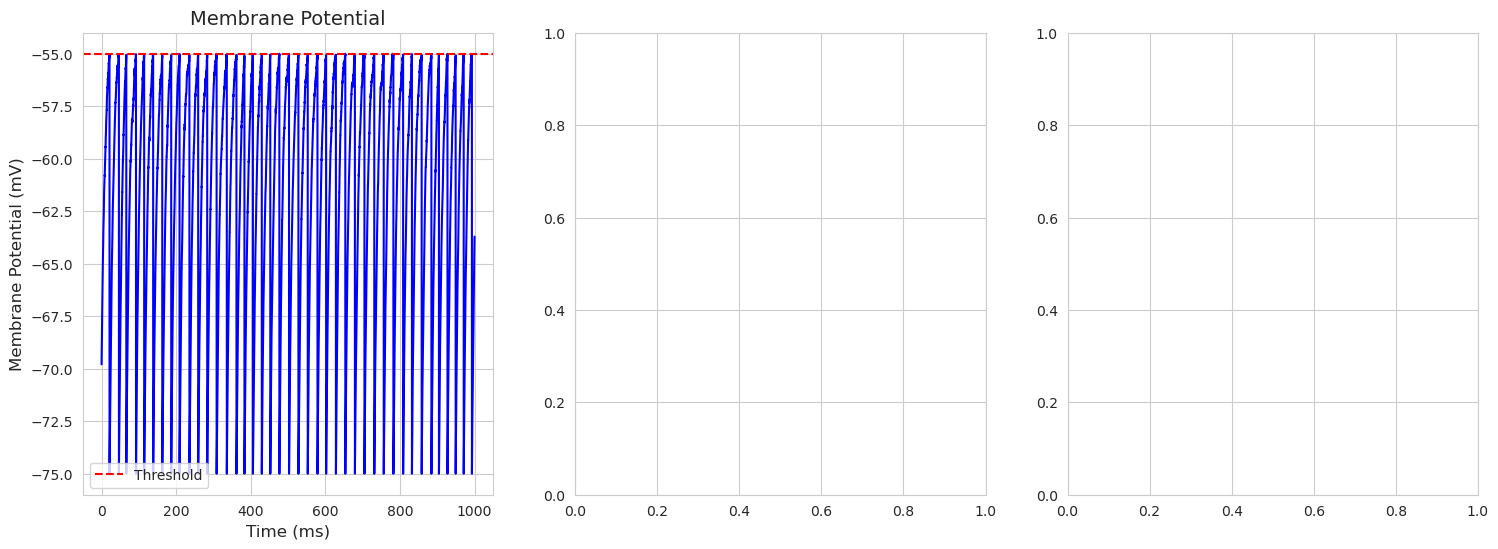

interactive(children=(FloatSlider(value=1.7, description='Input Rate (nA)', max=5.0), FloatSlider(value=0.5, d…

<function __main__.simulate(input_rate=2.5, noise_std=0.5, voltage_shift=0.0)>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

class SpikingNeuronInteractive:
    def __init__(self, resting_potential=-70.0, threshold=-55.0, reset_potential=-75.0, 
                 tau=10.0, resistance=10.0, dt=0.1):
        self.resting_potential = resting_potential
        self.threshold = threshold
        self.reset_potential = reset_potential
        self.tau = tau
        self.resistance = resistance
        self.dt = dt
        self.membrane_potential = resting_potential
        self.time = 0.0
        self.spike_times = []

    def update(self, input_current):
        dV = (-(self.membrane_potential - self.resting_potential) + 
              self.resistance * input_current) * (self.dt / self.tau)
        self.membrane_potential += dV
        if self.membrane_potential >= self.threshold:
            self.membrane_potential = self.reset_potential
            self.spike_times.append(self.time)
        self.time += self.dt

    def get_interspike_intervals(self):
        if len(self.spike_times) < 2:
            return []
        return np.diff(self.spike_times)


# Initialize the neuron and parameters
neuron = SpikingNeuronInteractive()
sim_duration = 1000  # Total simulation duration (ms)
dt = neuron.dt

def simulate(input_rate=2.5, noise_std=0.5, voltage_shift=0.0):
    # Properly reset neuron parameters for each simulation
    neuron.membrane_potential = neuron.resting_potential + voltage_shift
    neuron.reset_potential = -75 + voltage_shift
    neuron.spike_times = []
    neuron.time = 0.0  # Reset simulation time to zero

    time_points = np.arange(0, sim_duration, dt)
    membrane_potentials = []
    
    for _ in time_points:
        # Add Gaussian noise to the input current
        stochastic_input = np.random.normal(input_rate, noise_std)
        neuron.update(stochastic_input)
        membrane_potentials.append(neuron.membrane_potential)

    # Compute interspike intervals (ensure they are non-negative)
    interspike_intervals = neuron.get_interspike_intervals()
    if any(interval < 0 for interval in interspike_intervals):
        print("Warning: Negative interspike intervals detected!")
    
    clear_output(wait=True)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Left subplot: Membrane potential
    ax[0].plot(time_points, membrane_potentials, color="blue")
    ax[0].axhline(neuron.threshold, color='red', linestyle='--', label="Threshold")
    ax[0].set_title("Membrane Potential")
    ax[0].set_xlabel("Time (ms)")
    ax[0].set_ylabel("Membrane Potential (mV)")
    ax[0].legend()
    
    # Middle subplot: ISI histogram
    ax[1].hist(interspike_intervals, bins=20, color="green", edgecolor="black")
    ax[1].set_title("Interspike Interval (ISI) Histogram")
    ax[1].set_xlabel("ISI (ms)")
    ax[1].set_ylabel("Count")
    ax[1].set_xlim(15,35)

    # Right subplot: Number of spikes
    ax[2].bar(x=[0], height=[len(interspike_intervals)], color="purple")
    ax[2].set_ylim(0, 50)
    ax[2].set_xticks([0])
    ax[2].set_xticklabels(["Spike Count"])
    ax[2].set_title("Number of Spikes")
    
    plt.tight_layout()
    plt.show()
    print(interspike_intervals, end='\r')


# Interactive widgets
rate_slider = FloatSlider(value=1.7, min=0.0, max=5.0, step=0.1, description="Input Rate (nA)")
noise_slider = FloatSlider(value=0.5, min=0.0, max=2.0, step=0.1, description="Noise Std (nA)")
voltage_slider = FloatSlider(value=0.0, min=-1, max=1, step=0.1, description="Voltage Shift (mV)")

interact(simulate, input_rate=rate_slider, noise_std=noise_slider, voltage_shift=voltage_slider)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

# Set seaborn style
sns.set_style("whitegrid")

class SpikingNeuronInteractive:
    def __init__(self, resting_potential=-70.0, threshold=-55.0, reset_potential=-75.0, 
                 tau=10.0, resistance=10.0, dt=0.1):
        self.resting_potential = resting_potential
        self.threshold = threshold
        self.reset_potential = reset_potential
        self.tau = tau
        self.resistance = resistance
        self.dt = dt
        self.membrane_potential = resting_potential
        self.time = 0.0
        self.spike_times = []

    def update(self, input_current):
        dV = (-(self.membrane_potential - self.resting_potential) + 
              self.resistance * input_current) * (self.dt / self.tau)
        self.membrane_potential += dV
        if self.membrane_potential >= self.threshold:
            self.membrane_potential = self.reset_potential
            self.spike_times.append(self.time)
        self.time += self.dt

    def get_interspike_intervals(self):
        if len(self.spike_times) < 2:
            return np.array([])
        return np.diff(self.spike_times)


# Initialize the neuron and parameters
neuron = SpikingNeuronInteractive()
sim_duration = 2000  # Total simulation duration (ms)
dt = neuron.dt

def simulate(input_rate=2.5, noise_std=0.5, voltage_shift=0.0):
    # Properly reset neuron parameters for each simulation
    neuron.membrane_potential = neuron.resting_potential + voltage_shift
    neuron.reset_potential = -75 + voltage_shift
    neuron.spike_times = []
    neuron.time = 0.0  # Reset simulation time to zero

    time_points = np.arange(0, sim_duration, dt)
    membrane_potentials = []
    
    for _ in time_points:
        # Add Gaussian noise to the input current
        stochastic_input = np.random.normal(input_rate, noise_std)
        neuron.update(stochastic_input)
        membrane_potentials.append(neuron.membrane_potential)

    # Compute interspike intervals
    interspike_intervals = neuron.get_interspike_intervals()
    
    clear_output(wait=True)
    
    # Define the grid layout
    fig = plt.figure(figsize=(18, 8))
    grid = plt.GridSpec(2, 2, height_ratios=[2, 1], hspace=0.4, wspace=0.3)

    # Top subplot (spans two columns): Membrane potential
    ax1 = fig.add_subplot(grid[0, :])
    ax1.plot(time_points, membrane_potentials, color="blue", linewidth=1.5)
    ax1.axhline(neuron.threshold, color='red', linestyle='--', label="Threshold")
    ax1.set_title("Membrane Potential", fontsize=14)
    ax1.set_xlabel("Time (ms)", fontsize=12)
    ax1.set_ylabel("Membrane Potential (mV)", fontsize=12)
    ax1.legend(fontsize=10)

    # Bottom-left subplot: ISI KDE
    ax2 = fig.add_subplot(grid[1, 0])
    if interspike_intervals.size > 0:  # Explicitly check if the array is not empty
        sns.kdeplot(interspike_intervals, ax=ax2, fill=True, color="green", bw_adjust=0.5)
        ax2.set_xlim(15,35)
        ax2.axvline(np.mean(interspike_intervals), label="Mean ISI", color="orange", linestyle="--")
        ax2.legend(fontsize=10)
    else:
        ax2.text(0.5, 0.5, "No spikes detected", ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title("Interspike Interval (ISI) Density", fontsize=14)
    ax2.set_xlabel("ISI (ms)", fontsize=12)
    ax2.set_ylabel("Density", fontsize=12)

    # Bottom-right subplot: Number of spikes
    ax3 = fig.add_subplot(grid[1, 1])
    ax3.bar(x=[0], height=[len(interspike_intervals)], color="purple", alpha=0.7, edgecolor="black")
    ax3.set_ylim(0, max(1, len(interspike_intervals) + 10))
    ax3.set_xticks([0])
    ax3.set_xticklabels(["Spike Count"], fontsize=12)
    ax3.set_title("Number of Spikes", fontsize=14)

    plt.show()


# Interactive widgets
rate_slider = FloatSlider(value=1.7, min=0.0, max=5.0, step=0.1, description="Input Rate (nA)")
noise_slider = FloatSlider(value=0.5, min=0.0, max=2.0, step=0.1, description="Noise Std (nA)")
voltage_slider = FloatSlider(value=0.0, min=-1, max=1, step=0.1, description="Voltage Shift (mV)")

interact(simulate, input_rate=rate_slider, noise_std=noise_slider, voltage_shift=voltage_slider)


interactive(children=(FloatSlider(value=1.7, description='Input Rate (nA)', max=5.0), FloatSlider(value=0.5, d…

<function __main__.simulate(input_rate=2.5, noise_std=0.5, voltage_shift=0.0)>